In [10]:
from spacy import load, prefer_gpu 
from helpers import get_dates_from_file
from glob import glob
from tqdm import tqdm
import pandas as pd 
# Parameters
# prefer_gpu()
folder = "./results/Figaro/1898"
nlp = load("fr_core_news_md")


In [11]:
results = []
for file in tqdm(glob(folder + "/*/*.csv")):
    print(file)
    results.append(get_dates_from_file(file,nlp,rt = 0.75, lt = 15))


  0%|          | 0/364 [00:00<?, ?it/s]


./results/Figaro/1898\1\1.csv


ValueError: time data 'o/1898\\1\\1' does not match format '%Y\\%m\\%d'

<AxesSubplot:xlabel='Date', ylabel='Number of dates'>

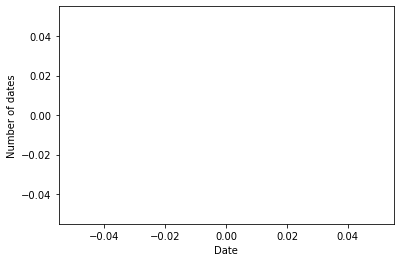

In [3]:
df = pd.DataFrame(results, columns=["Date", "Number of dates"])
df.plot(x = "Date", y = "Number of dates", kind = "scatter")


In [12]:
nb = []
for file in tqdm(glob(folder + "/*/*.csv")):
    nb.append(pd.read_csv(file)["Length"].sum())

100%|██████████| 91/91 [00:01<00:00, 70.11it/s]


In [14]:
df["length"] = nb["Number of dates"]

In [20]:
df["ratio"] = (df["Number of dates"]/df["length"]).rolling(window = 10).mean()

<AxesSubplot:xlabel='Date', ylabel='ratio'>

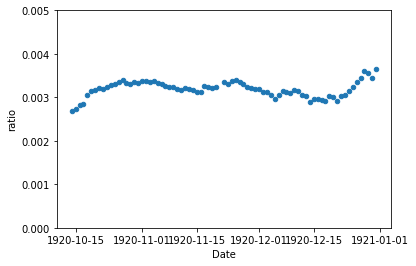

In [24]:
df.plot(x= "Date", y = "ratio", kind = "scatter", ylim = (0,0.0050))

In [2]:
from helpers import compute_ratio


In [14]:
text = "hi my name is what my name is who my name is tiki tiki slim shady Thomas"
tok = text.split()
compute_ratio(tok)

(0.8823529411764706, 17)

In [15]:
%%timeit
a = 5


18 ns ± 1.08 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
